<hr>
<p style="text-align:left;">
    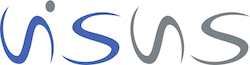
    <span style="float:right;">
        University of Stuttgart<br />Visualization Research Center
    </span>
</p>
<hr>
<p style="text-align:left;">
    <span style="float:left;">
        Prof. Daniel Weiskopf
    </span>
    <span style="float:right;">
        Sunday, 2024-11-10
    </span>
</p>
<br/>

# Theoretical and Methodological Foundations of Visual Computing
## Assignment 04
Responsible tutor: Daniel Klötzl
<br/>

> *Please submit your solution to ILIAS by <b>Sunday, 2024-11-17, 23:55</b>. <br /> Solutions will be discussed in the tutorial on <b>Thursday, 2024-11-21</b>.* <br /> *Please note that source code will only be accepted if it compiles.*
<hr>

**Student name(s):** <font color='green'>Guangxin Zhao</font> <br />
**Immatriculation number(s):** <font color='green'>st194136</font> <br />

<hr>

### Exercise 4.1 (10 points)
In this task you are going to visualize a height field of the Mars surface (source: https://pds-geosciences.wustl.edu/missions/mgs/megdr.html). Please pull changes from the OpenGL-tutorial repository shared in Assignment 01 and recompile your executables. For doing so, you can delete your existing build folder and create a new one. Then, the compilation follows the same commands as discussed in Assignment 01.

The provided plugin already loads data onto the GPU, so your task will be to implement the required computations in the fragment shader.
When developing, remember that you can reload the shader code without restarting the application using the `R` key. 
Any shader compilation errors will be printed into the console.

Examples of the expected solutions are shown below: 





<div style="display: flex; gap: 10px;">
    <div style="text-align: center;">
      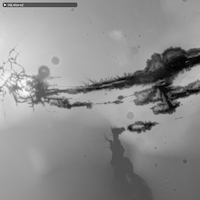
      <p>Height map</p>
   </div>
  <div style="text-align: center;">
      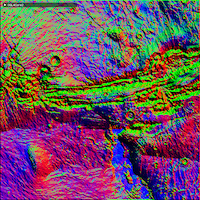
      <p>Surface normals</p>
   </div>
   
   <div style="text-align: center;">
      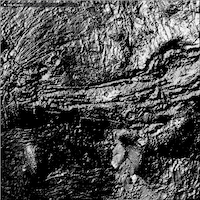
      <p>Diffuse lighting</p>
   </div>
   
   <div style="text-align: center;">
      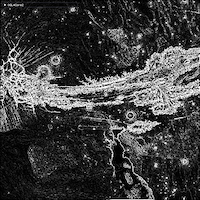
      <p>Mean curvature</p>
   </div>
</div>





`(a)` Use central differences to calculate the tangents $\vec{t}_x$ and $\vec{t}_y$ in the $x$- and $y$-directions at every point, 
		and determine the normal direction $\vec{n} = \vec{t}_x \times \vec{t}_y$. Render the normal map by using the normal's coordinates as values for the RGB channels.  
   > Hint: To do a lookup of a texel in the texture using its integer coordinates, look at the provided function `fetch`.*  
   > Hint: The texture contains floating point values of the elevation in *meters*. Use the variable `lengthScale` as the size of a texel, which will impact the scaling.*

`(b)` Render simple illumination by calculating the dot product between the normal and the light direction at every point and representing it as a gray value.

`(c)` Calculate at every point the Hessian matrix and its eigenvalues (principal curvatures) $\lambda_1$ and $\lambda_2$. From that, create a gray image with the mean curvature $H=(\lambda_1+\lambda_2)/2$


<hr>

### Exercise 4.2 (5 points)

Given the domain $\Omega_n = \left\{(x,y)\in\mathbb{R}^2\vert\frac{1}{n}<\sqrt{x^2+y^2}<n\right\}$ with $1<n\in \mathbb{R}$.

`(a)` Draw the function 
$$ f(x,y)=\mathrm{e}^{-\frac{1}{2}(x^2+y^2)} $$
for the domains $\Omega_{1.2}, \Omega_2, \Omega_{2.5}$, and $\Omega_3$ using Python.

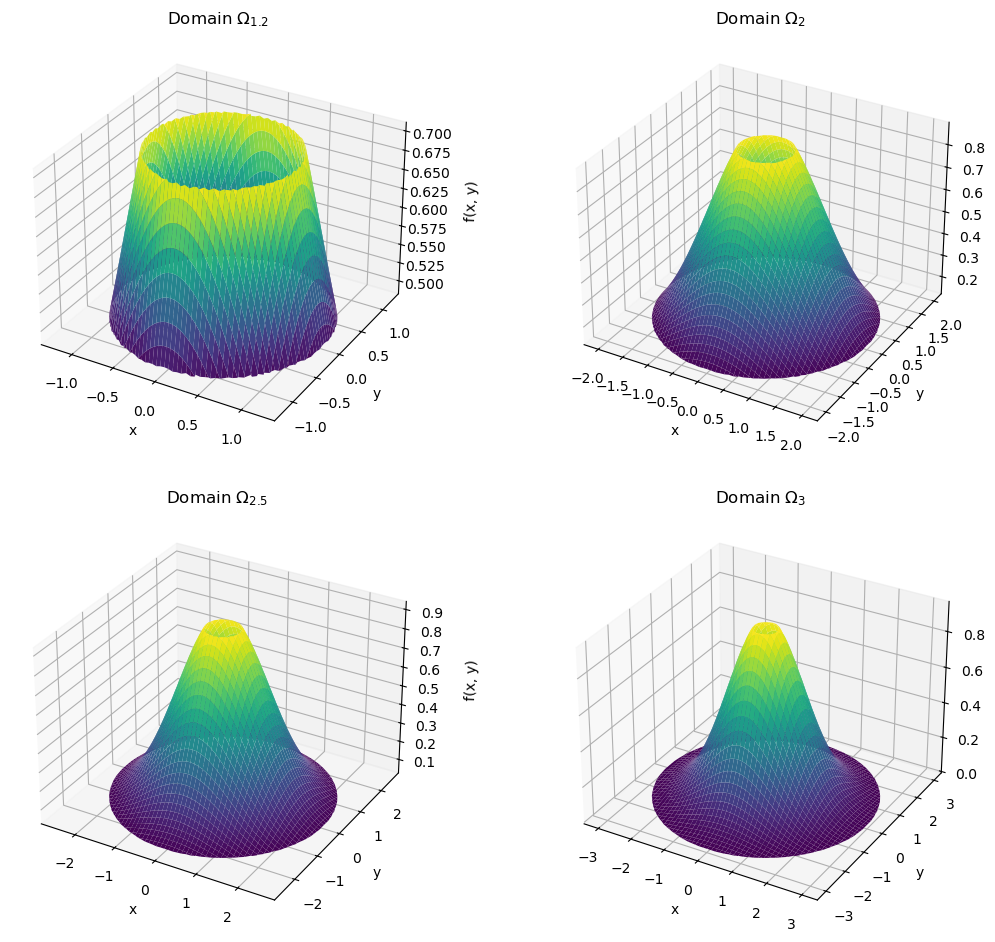

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def f(x, y):
    return np.exp(-0.5 * (x**2 + y**2))

def plot_function(n, ax):
    # Generate grid points
    x = np.linspace(-n, n, 400)
    y = np.linspace(-n, n, 400)
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)
    
    # Compute radial distance
    R = np.sqrt(X**2 + Y**2)
    
    # Mask the regions outside the specified domain
    Z = np.where((R > 1/n) & (R < n), Z, np.nan)

    # Plot
    surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
    ax.set_title(f"Domain $\Omega_{{{n}}}$")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("f(x, y)", labelpad=10)

# Plot for different domains
fig = plt.figure(figsize=(12, 10))
domains = [1.2, 2, 2.5, 3]

for i, n in enumerate(domains):
    ax = fig.add_subplot(2, 2, i+1, projection='3d')
    plot_function(n, ax)

plt.tight_layout(pad=3.0)

plt.show()

`(b)` Calculate the integral for fixed $1<n\in \mathbb{R}$
$$ A_n = \iint_{\Omega_n} \mathrm{e}^{-\frac{1}{2}(x^2+y^2)}\mathrm{d}x\mathrm{d}y.$$

> Hint: Transform the coordinates $x$ and $y$ to a more convenient representation.

Let $x=r\cos{\theta}, y=r\sin{\theta}$ ($\frac{1}{n}<r<n, 0\leq\theta<2\pi$), then the integral becomes

\begin{align*}
    A_n &=\int_{0}^{2\pi}\int_{\frac{1}{n}}^{n} \mathrm{e}^{-\frac{1}{2}r^2}r\, \mathrm{d}r\mathrm{d}\theta \\
        &=\int_{0}^{2\pi}\left[-\mathrm{e}^{-\frac{1}{2}r^2}\right]_{\frac{1}{n}}^{n} \mathrm{d}\theta \\
        &=\int_{0}^{2\pi}\left(-\mathrm{e}^{-\frac{n^2}{2}}+\mathrm{e}^{-\frac{1}{2n^2}}\right) \mathrm{d}\theta \\
        &=2\pi\left(\mathrm{e}^{-\frac{1}{2n^2}}-\mathrm{e}^{-\frac{n^2}{2}}\right).
\end{align*}

`(c)` Determine the limit $\lim\limits_{n\rightarrow \infty} A_n$.

\begin{align*}
    \lim\limits_{n\rightarrow \infty} A_n &= \lim\limits_{n\rightarrow \infty} 2\pi\left(\mathrm{e}^{-\frac{1}{2n^2}}-\mathrm{e}^{-\frac{n^2}{2}}\right) \\
    &= 2\pi\left(\lim\limits_{n\rightarrow \infty}\mathrm{e}^{-\frac{1}{2n^2}}-\lim\limits_{n\rightarrow \infty}\mathrm{e}^{-\frac{n^2}{2}}\right) \\
    &= 2\pi\left(\mathrm{e}^0-0\right) \\
    &= 2\pi.
\end{align*}

<hr>

### Exercise 4.3 (5 points)

Given the vector field
$$ \vec{H}(x,y,z) = \frac{1}{x^2+y^2}\begin{pmatrix} -y \\ x \\ 0 \end{pmatrix}, $$

Determine the vectorial line integral of $\vec{H}$ along a circular line in the $xy$-plane with radius $r>0$ and the origin as center.

> Hint: Use cylindrical coordinates with $\rho = \sqrt{x^2+y^2}$, $\varphi = \text{atan2}(y,x)$, and $z$ to represent $\vec{H}$ via $$ \vec{H}(\rho,\varphi,z) = \frac{1}{\rho^2}\begin{pmatrix} -\rho\sin\varphi \\ \rho\cos\varphi \\ 0 \end{pmatrix}. $$

Let 

\begin{align*}
    \vec{\alpha}(t) = 
        \begin{pmatrix} 
            r\cos{t} \\ 
            r\sin{t} \\ 
            0 
        \end{pmatrix}, \quad 0\leq t\leq 2\pi,
\end{align*}

be the parametrization of the circular line.

The tangent vector is given by

\begin{align*}
    \dot{\vec{\alpha}}(t) = 
        \begin{pmatrix} 
            -r\sin{t} \\ 
            r\cos{t} \\ 
            0 
        \end{pmatrix}.
\end{align*}

Substitute $\vec{\alpha}(t)$ and $\dot{\vec{\alpha}}(t)$ into $\vec{H}$, we get

\begin{align*}
    \int_{\vec{\alpha}}\vec{H}\cdot \mathrm{d}\vec{x} 
        &= \int_{0}^{2\pi}\langle\vec{H}(\vec{\alpha}(t)),\dot{\vec{\alpha}}(t)\rangle\, \mathrm{d}t \\
        &= \int_{0}^{2\pi}\frac{1}{r^2\cos^2{t}+r^2\sin^2{t}}\begin{pmatrix} -r\sin{t} \\ r\cos{t} \\ 0 \end{pmatrix}\cdot
            \begin{pmatrix} 
                -r\sin{t} \\ 
                r\cos{t} \\ 
                0 
            \end{pmatrix} \mathrm{d}t \\
        &= \int_{0}^{2\pi}\frac{1}{r^2}
            \begin{pmatrix} 
                -r\sin{t} \\ 
                r\cos{t} \\ 
                0 
            \end{pmatrix}\cdot
            \begin{pmatrix} 
                -r\sin{t} \\ 
                r\cos{t} \\ 
                0 
            \end{pmatrix} \mathrm{d}t\\
        &= \int_{0}^{2\pi}\frac{1}{r^2}\left(r^2\sin^2{t}+r^2\cos^2{t}\right) \mathrm{d}t \\
        &= \int_{0}^{2\pi}1\, \mathrm{d}t \\
        &= 2\pi.
\end{align*}

<div class="alert alert-success">

### Guidelines for Submission

Do not forget to update the student name(s) and matriculation number(s). 

**Text-based Responses**

For text-based questions, a markdown cell with the placeholder `Cell left blank for student response` will usually follow the question. Ensure that text responses are either entered in markdown cells using plain text and LaTeX or via the import of PDFs or PNG files (e.g. via `![ExampleFileName](example_file.png)` for handwritten solutions). If external files are used in your Jupyter Notebook, make sure to include all data in a zipped folder uploaded to Ilias.

**Code-based Responses**

For questions that involve Python coding, you'll typically find a code cell with the placeholder `# YOUR CODE HERE`.

#### Submission Process

To ensure your notebook runs smoothly from start to finish, select "Restart & Run All" from the "Kernel" menu before submitting.

When ready to submit, upload your `.ipynb` file (or a zipped folder containing the `.ipynb` file as well as all auxiliary files, e.g. imported .pdf or .jpg files) to Ilias.

</div>